<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/Three_Classes_and_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from sklearn.metrics import plot_confusion_matrix

# Clone Dataset

In [ ]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/Covid-19-CXR-Dataset.git

Cloning into 'Covid-19-CXR-Dataset'...
remote: Enumerating objects: 4366, done.
remote: Total 4366 (delta 0), reused 0 (delta 0), pack-reused 4366
Receiving objects: 100% (4366/4366), 2.82 GiB | 24.70 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (4350/4350), done.


In [ ]:
import os
base_dir = '/content/Covid-19-CXR-Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')
train_Pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

test_covid_dir = os.path.join(test_dir, 'Covid')
test_normal_dir = os.path.join(test_dir, 'Normal')
test_Pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:3])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:3])

train_Pneumonia_names = os.listdir(train_Pneumonia_dir)
print(train_Pneumonia_names[:3])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:3])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:3])

test_Pneumonia_names = os.listdir(test_Pneumonia_dir)
print(test_Pneumonia_names[:3])

['COVID-19 (268).png', 'COVID-19 (605).png', 'COVID-19 (504).png']
['NORMAL (345).png', 'NORMAL (492).png', 'NORMAL (31).png']
['Viral Pneumonia (599).png', 'Viral Pneumonia (1092).png', 'Viral Pneumonia (201).png']
['yxppt-2020-02-19_00-51-27_287214-day10.jpg', 'COVID-19 (845).png', 'ansu-publish-ahead-of-print-10.1097.sla.0000000000003955-g001-d.png']
['NORMAL (179).png', 'NORMAL (279).png', 'NORMAL (323).png']
['Viral Pneumonia (1081).png', 'Viral Pneumonia (309).png', 'Viral Pneumonia (1020).png']


In [ ]:
print("train dataset covid images: ", len(train_covid_names))
print("train dataset normal images: ", len(train_normal_names))
print("train dataset Pneumonia images: ", len(train_Pneumonia_names))
print("test dataset covid images: ", len(test_covid_names))
print("test dataset normal images: ", len(test_normal_names))
print("test dataset Pneumonia images: ", len(test_Pneumonia_names))

print("total train images: ", len(train_covid_names+train_normal_names+train_Pneumonia_names))
print("total test images: ", len(test_covid_names+test_normal_names+test_Pneumonia_names))

train dataset covid images:  1330
train dataset normal images:  1072
train dataset Pneumonia images:  1076
test dataset covid images:  333
test dataset normal images:  269
test dataset Pneumonia images:  269
total train images:  3478
total test images:  871


# Generating Training, Validation & testing Batches

In [ ]:
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Generator for our Validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

#Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')


Found 2783 images belonging to 3 classes.
Found 695 images belonging to 3 classes.
Found 871 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
train_generator.image_shape

(150, 150, 3)

# Data Visualization





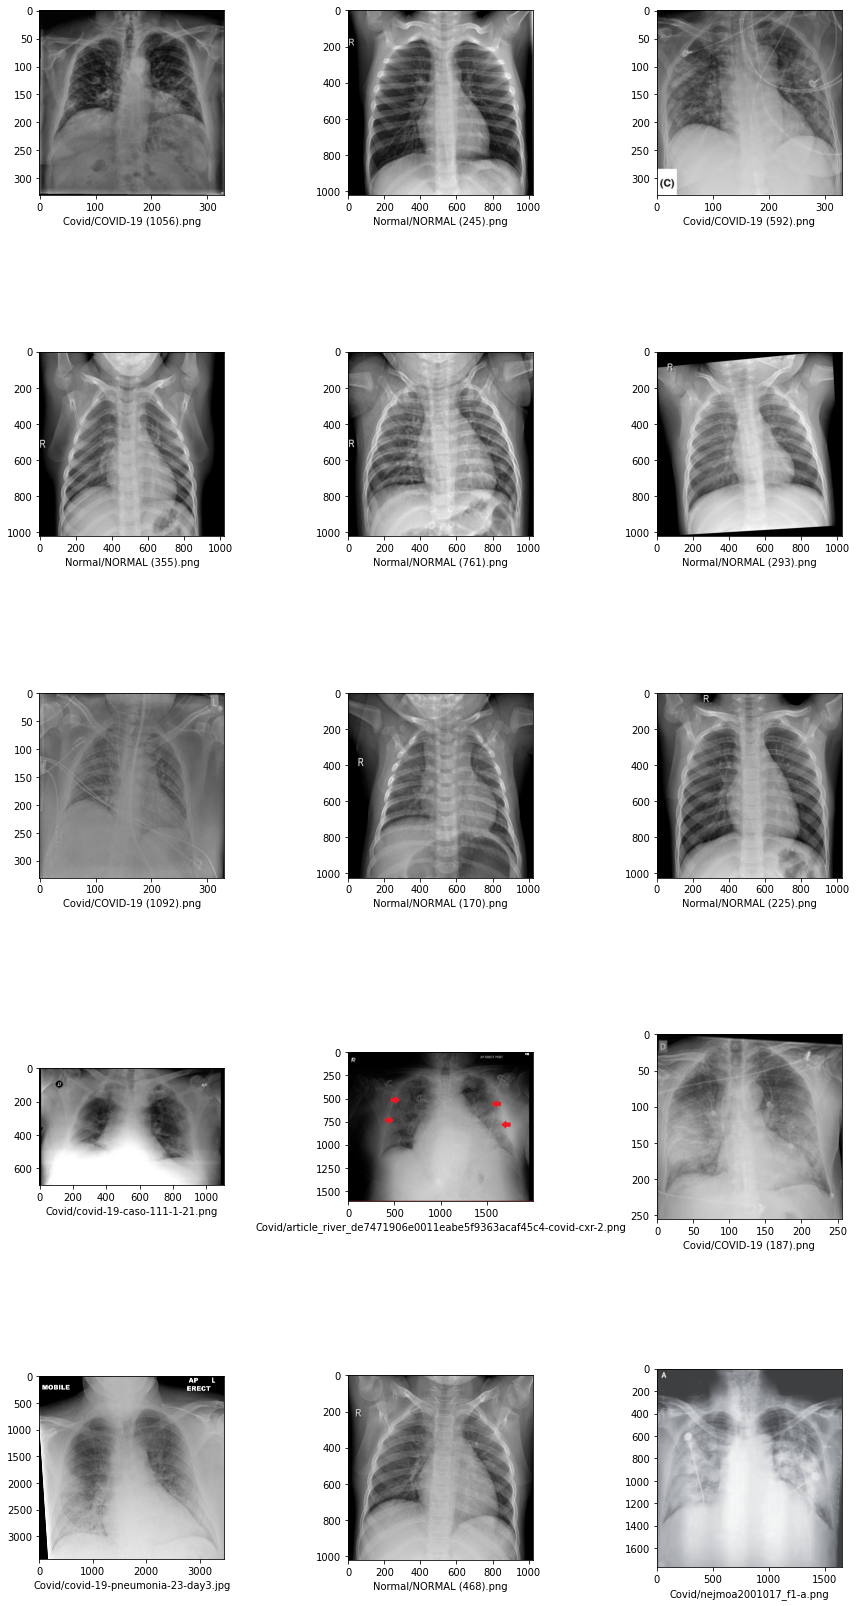

In [ ]:
plt.figure(figsize=(12, 24))
files = 0
for i in range(0, 15):
    
    plt.subplot(5, 3, i+1)
    
    for X_batch in range(1922):
        img = mpimg.imread(train_generator.filepaths[files])
        #image = X_batch[files]
        plt.imshow(img)
        plt.xlabel(train_generator.filenames[files] )
        files = random.randrange(0, 1922, 1)
        break
        
plt.tight_layout()
plt.show()

# Dataset

## Credits and Links

1. [Covid Chest X Ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset)

  520 Covid-19 Images

2. [COVID-19 Radiography Database](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)

  1341 Normal Images<br>
  1143 Covid-19 Images <br>
  1345 Viral Pneumonia Images<br>


# `Our Dataset`
Split | Normal | Covid19|Viral Pneumonia|Total|
------|:------:|:------:|:---:          |:---:|
Train | 1072   |1330    |1076           |3478 |
Test  | 269    |333     | 269           |871  |
**Total**| **1341**   | **1663**    |   **1345**     |   **4349**   |

# Build CNN Model

In [ ]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

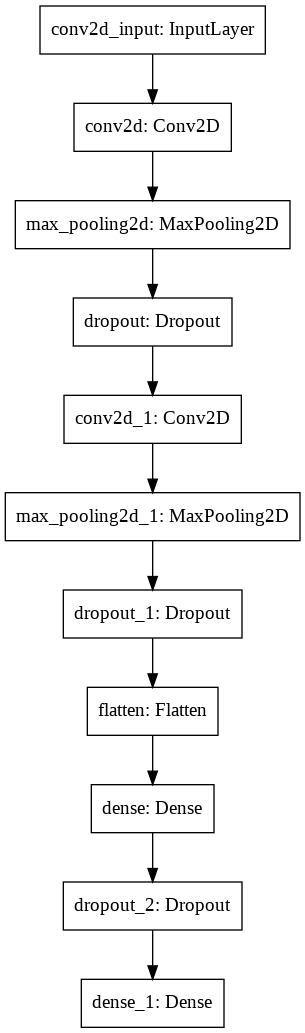

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# Model Without Dropout Layer


model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model2.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model2.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model2.add(Flatten())

# add a dense layer : amount of nodes, activation
model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
#model2.add(Dropout(0.5))
model2.add(Dense(3, activation = 'sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               22429952  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

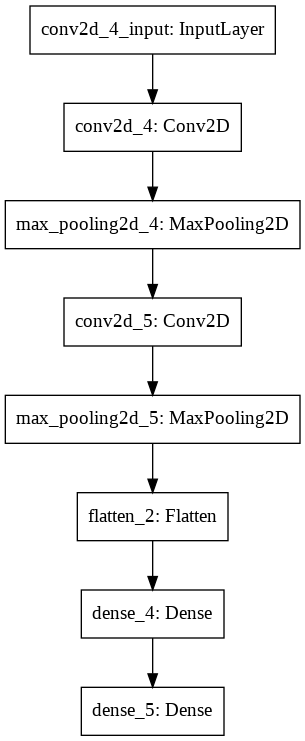

In [ ]:
tf.keras.utils.plot_model(model2)

In [ ]:
# Model with batch Normalization layer

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(3, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 71, 71, 64)       

# Compile & Train Model

In [ ]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model2.compile(Adam(lr = 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model3.compile(Adam(lr = 0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# train the model
%%time
history1 = model.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/30
87/87 [==============================] - 117s 1s/step - loss: 1.4289 - accuracy: 0.5536 - val_loss: 0.6045 - val_accuracy: 0.7625
Epoch 2/30
87/87 [==============================] - 83s 951ms/step - loss: 0.5214 - accuracy: 0.7792 - val_loss: 0.6376 - val_accuracy: 0.7031
Epoch 3/30
87/87 [==============================] - 82s 945ms/step - loss: 0.4815 - accuracy: 0.8144 - val_loss: 0.4915 - val_accuracy: 0.8031
Epoch 4/30
87/87 [==============================] - 82s 939ms/step - loss: 0.4494 - accuracy: 0.8126 - val_loss: 0.4381 - val_accuracy: 0.8531
Epoch 5/30
87/87 [==============================] - 82s 942ms/step - loss: 0.4438 - accuracy: 0.8247 - val_loss: 0.3213 - val_accuracy: 0.8844
Epoch 6/30
87/87 [==============================] - 81s 936ms/step - loss: 0.3772 - accuracy: 0.8485 - val_loss: 0.3587 - val_accuracy: 0.8687
Epoch 7/30
87/87 [==============================] - 81s 937ms/step - loss: 0.3686 - accuracy: 0.8640 - val_loss: 0.4207 - val_accuracy: 0.8344
E

In [ ]:
# train the model
%%time
history2 = model2.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/30
87/87 [==============================] - 83s 948ms/step - loss: 1.8733 - accuracy: 0.5940 - val_loss: 0.6328 - val_accuracy: 0.7344
Epoch 2/30
87/87 [==============================] - 80s 920ms/step - loss: 0.3725 - accuracy: 0.8451 - val_loss: 0.3567 - val_accuracy: 0.8687
Epoch 3/30
87/87 [==============================] - 80s 922ms/step - loss: 0.3679 - accuracy: 0.8601 - val_loss: 0.2426 - val_accuracy: 0.9219
Epoch 4/30
87/87 [==============================] - 79s 916ms/step - loss: 0.3113 - accuracy: 0.8865 - val_loss: 0.2263 - val_accuracy: 0.9312
Epoch 5/30
87/87 [==============================] - 81s 928ms/step - loss: 0.2574 - accuracy: 0.9050 - val_loss: 0.2616 - val_accuracy: 0.9094
Epoch 6/30
87/87 [==============================] - 81s 927ms/step - loss: 0.2314 - accuracy: 0.9093 - val_loss: 0.2681 - val_accuracy: 0.8844
Epoch 7/30
87/87 [==============================] - 81s 929ms/step - loss: 0.2710 - accuracy: 0.8974 - val_loss: 0.2224 - val_accuracy: 0.9250

In [ ]:
# train the model
%%time
history3 = model3.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/30
87/87 [==============================] - 85s 946ms/step - loss: 3.0657 - accuracy: 0.7053 - val_loss: 14.2239 - val_accuracy: 0.2844
Epoch 2/30
87/87 [==============================] - 82s 941ms/step - loss: 0.6676 - accuracy: 0.8066 - val_loss: 7.1372 - val_accuracy: 0.3875
Epoch 3/30
87/87 [==============================] - 81s 933ms/step - loss: 0.5414 - accuracy: 0.8200 - val_loss: 2.8524 - val_accuracy: 0.5594
Epoch 4/30
87/87 [==============================] - 82s 943ms/step - loss: 0.3914 - accuracy: 0.8641 - val_loss: 8.6952 - val_accuracy: 0.5688
Epoch 5/30
87/87 [==============================] - 82s 936ms/step - loss: 0.3273 - accuracy: 0.8788 - val_loss: 4.2889 - val_accuracy: 0.4531
Epoch 6/30
87/87 [==============================] - 83s 953ms/step - loss: 0.3157 - accuracy: 0.8964 - val_loss: 0.6604 - val_accuracy: 0.7281
Epoch 7/30
87/87 [==============================] - 82s 942ms/step - loss: 0.3297 - accuracy: 0.8833 - val_loss: 0.3302 - val_accuracy: 0.871

# Plotting Loss and Accuracy Graph

Text(0.5, 1.0, 'Accuracy Evolution')

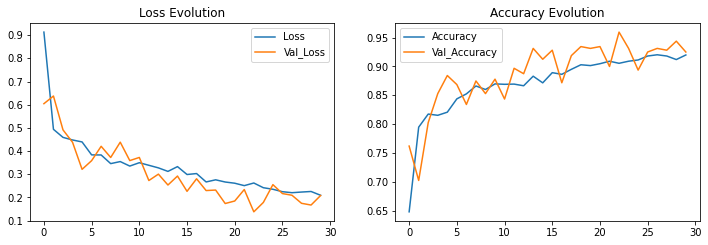

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Loss')
plt.plot(history1.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

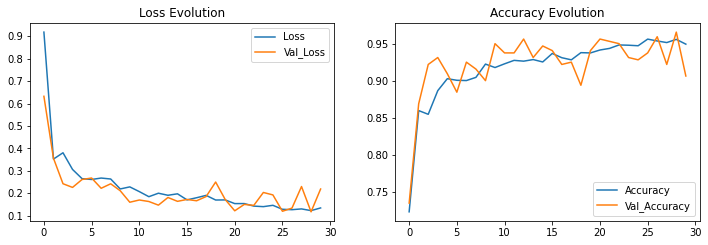

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

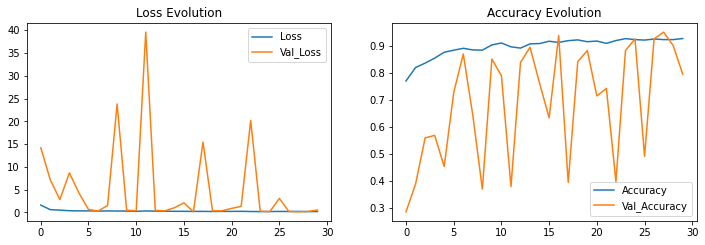

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Evaluation of Model

In [ ]:
test_loss, test_acc = model.evaluate(test_generator )
print('test acc: {} test loss: {}'.format(test_acc,test_loss))

28/28 [==============================] - 23s 837ms/step - loss: 0.1895 - accuracy: 0.9357
test acc: 0.9357060790061951 test loss: 0.18945209681987762


In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

28/28 [==============================] - 18s 638ms/step - loss: 0.1895 - accuracy: 0.9357
Test Accuracy: 93.57%
87/87 [==============================] - 68s 778ms/step - loss: 0.1880 - accuracy: 0.9360
Train Accuracy: 93.60%


In [ ]:
evaluation2 = model2.evaluate(test_generator )
print(f"Test Accuracy: {evaluation2[1] * 100:.2f}%")

evaluation2 = model2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation2[1] * 100:.2f}%")

28/28 [==============================] - 18s 645ms/step - loss: 0.1728 - accuracy: 0.9414
Test Accuracy: 94.14%
87/87 [==============================] - 68s 779ms/step - loss: 0.1236 - accuracy: 0.9522
Train Accuracy: 95.22%


In [ ]:
evaluation3 = model3.evaluate(test_generator)
print(f"Test Accuracy: {evaluation3[1] * 100:.2f}%")

evaluation3 = model3.evaluate(train_generator)
print(f"Train Accuracy: {evaluation3[1] * 100:.2f}%")

28/28 [==============================] - 18s 656ms/step - loss: 0.3597 - accuracy: 0.8358
Test Accuracy: 83.58%
87/87 [==============================] - 70s 808ms/step - loss: 0.3831 - accuracy: 0.8739
Train Accuracy: 87.39%


# Confusion Matrics

# Transfer Learning
# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

![download.png](https://pytorch.org/assets/images/densenet1.png)

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K


In [ ]:
densedet121 = DenseNet121(input_shape=(150, 150, 3), include_top=False, weights='imagenet', pooling='max')

#densedet121.summary()

29089792/29084464 [==============================] - 1s 0us/step


In [ ]:
layers = densedet121.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {densedet121.input}")
print(f"The output shape {densedet121.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='max_pool/Max:0', description="created by layer 'max_pool'")


In [ ]:

#model = Sequential()
densedet121 = DenseNet121(include_top=False, weights='imagenet')
x = densedet121.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(3, activation="sigmoid")(x)

model4 = Model(inputs=densedet121.input, outputs=predictions)
#model.add(densedet121)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))


model4.compile(
               loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.785422 to fit



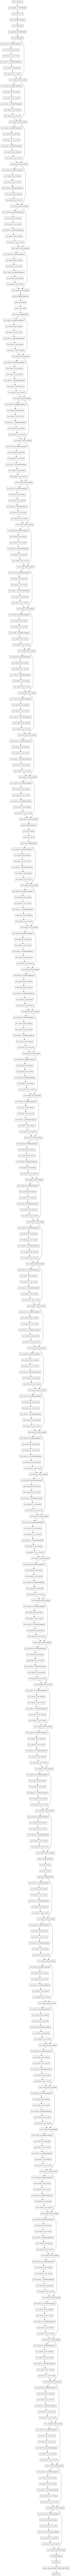

In [ ]:
tf.keras.utils.plot_model(model4)

In [ ]:
history4 = model4.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/30
87/87 [==============================] - 111s 1s/step - loss: 0.5095 - accuracy: 0.8319 - val_loss: 5.1140 - val_accuracy: 0.6031
Epoch 2/30
87/87 [==============================] - 90s 1s/step - loss: 0.1611 - accuracy: 0.9428 - val_loss: 0.5001 - val_accuracy: 0.7937
Epoch 3/30
87/87 [==============================] - 90s 1s/step - loss: 0.1278 - accuracy: 0.9554 - val_loss: 1.1129 - val_accuracy: 0.7563
Epoch 4/30
87/87 [==============================] - 91s 1s/step - loss: 0.1329 - accuracy: 0.9519 - val_loss: 0.7584 - val_accuracy: 0.7188
Epoch 5/30
87/87 [==============================] - 90s 1s/step - loss: 0.1359 - accuracy: 0.9472 - val_loss: 1.5634 - val_accuracy: 0.7094
Epoch 6/30
87/87 [==============================] - 90s 1s/step - loss: 0.0881 - accuracy: 0.9681 - val_loss: 0.1570 - val_accuracy: 0.9344
Epoch 7/30
87/87 [==============================] - 90s 1s/step - loss: 0.0895 - accuracy: 0.9683 - val_loss: 1.1746 - val_accuracy: 0.6594
Epoch 8/30
87/87 [=

Text(0.5, 1.0, 'Accuracy Evolution')

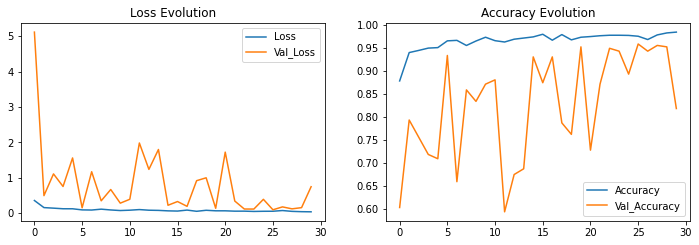

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.plot(history4.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation4 = model4.evaluate(test_generator)
print(f"Test Accuracy: {evaluation4[1] * 100:.2f}%")

evaluation4 = model4.evaluate(train_generator)
print(f"Train Accuracy: {evaluation4[1] * 100:.2f}%")

28/28 [==============================] - 20s 715ms/step - loss: 1.0368 - accuracy: 0.8002
Test Accuracy: 80.02%
87/87 [==============================] - 72s 825ms/step - loss: 0.3812 - accuracy: 0.8872
Train Accuracy: 88.72%


# Evaluation

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,accuracy,macro avg,weighted avg
precision,0.393293,0.338926,0.302041,0.349024,0.344753,0.348320
recall,0.387387,0.375465,0.275093,0.349024,0.345982,0.349024
f1-score,0.390318,0.356261,0.287938,0.349024,0.344839,0.348181
support,333.000000,269.000000,269.000000,0.349024,871.000000,871.000000


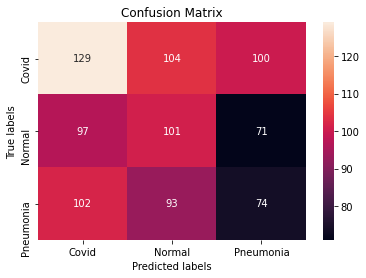

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns 

predicted_vals = model.predict_classes(test_generator)

cm = confusion_matrix(test_generator.classes, predicted_vals)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

pd.DataFrame(classification_report(test_generator.classes, predicted_vals, output_dict=True))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,accuracy,macro avg,weighted avg
precision,0.387387,0.315615,0.316456,0.343284,0.339819,0.343314
recall,0.387387,0.353160,0.278810,0.343284,0.339786,0.343284
f1-score,0.387387,0.333333,0.296443,0.343284,0.339054,0.342606
support,333.000000,269.000000,269.000000,0.343284,871.000000,871.000000


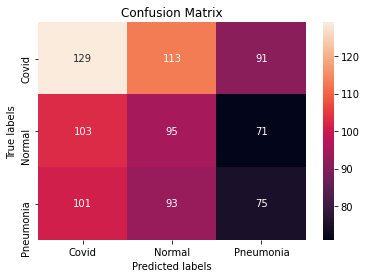

In [ ]:
predicted_vals = model2.predict_classes(test_generator)

cm = confusion_matrix(test_generator.classes, predicted_vals)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

pd.DataFrame(classification_report(test_generator.classes, predicted_vals, output_dict=True))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,accuracy,macro avg,weighted avg
precision,0.385714,0.280323,0.312500,0.334099,0.326179,0.330554
recall,0.486486,0.386617,0.092937,0.334099,0.322013,0.334099
f1-score,0.430279,0.325000,0.143266,0.334099,0.299515,0.309123
support,333.000000,269.000000,269.000000,0.334099,871.000000,871.000000


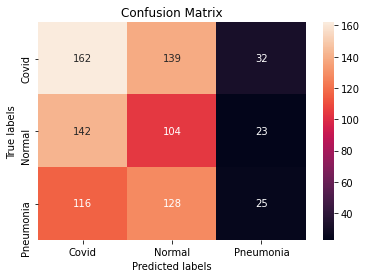

In [ ]:
predicted_vals = model3.predict_classes(test_generator)

cm = confusion_matrix(test_generator.classes, predicted_vals)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

pd.DataFrame(classification_report(test_generator.classes, predicted_vals, output_dict=True))

# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

![download7.png](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
vgg16_base_model = VGG16(include_top=False, input_shape=(150,150,3))

# Copy VGG16 Layer by Layer into Sequential Model
vgg16_model = Sequential() 
for layer in vgg16_base_model.layers:
  vgg16_model.add(layer)

for layer in vgg16_model.layers:
  layer.trainable = False

vgg16_model.pop() # removes the last layer of Dense Layer 1000
vgg16_model.add(Flatten())
vgg16_model.add(Dense(3, activation='softmax'))
vgg16_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)     

In [ ]:
vgg16_model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history5 = vgg16_model.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/30
87/87 [==============================] - 85s 975ms/step - loss: 0.7072 - accuracy: 0.7163 - val_loss: 0.2838 - val_accuracy: 0.9375
Epoch 2/30
87/87 [==============================] - 85s 976ms/step - loss: 0.2532 - accuracy: 0.9388 - val_loss: 0.2482 - val_accuracy: 0.9125
Epoch 3/30
87/87 [==============================] - 84s 967ms/step - loss: 0.2130 - accuracy: 0.9385 - val_loss: 0.1768 - val_accuracy: 0.9344
Epoch 4/30
87/87 [==============================] - 85s 973ms/step - loss: 0.1796 - accuracy: 0.9442 - val_loss: 0.1531 - val_accuracy: 0.9500
Epoch 5/30
87/87 [==============================] - 85s 974ms/step - loss: 0.1717 - accuracy: 0.9448 - val_loss: 0.1850 - val_accuracy: 0.9344
Epoch 6/30
87/87 [==============================] - 83s 952ms/step - loss: 0.1709 - accuracy: 0.9467 - val_loss: 0.1823 - val_accuracy: 0.9187
Epoch 7/30
87/87 [==============================] - 83s 954ms/step - loss: 0.1502 - accuracy: 0.9524 - val_loss: 0.1653 - val_accuracy: 0.9375

Text(0.5, 1.0, 'Accuracy Evolution')

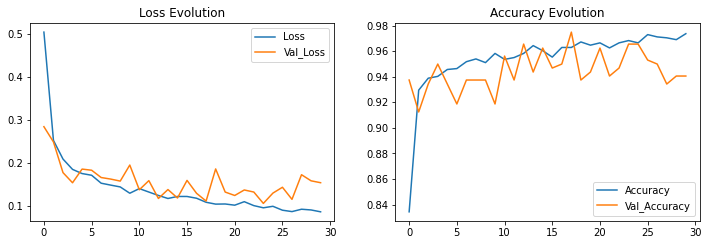

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history5.history['loss'], label='Loss')
plt.plot(history5.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history5.history['accuracy'], label='Accuracy')
plt.plot(history5.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation_vgg =vgg16_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation_vgg[1] * 100:.2f}%")

evaluation_vgg = vgg16_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation_vgg[1] * 100:.2f}%")

28/28 [==============================] - 20s 723ms/step - loss: 0.1534 - accuracy: 0.9449
Test Accuracy: 94.49%
87/87 [==============================] - 71s 811ms/step - loss: 0.0797 - accuracy: 0.9723
Train Accuracy: 97.23%


# ResNet50

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [ ]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(150,150,3), include_top=False, weights='imagenet')



In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(3,activation="softmax")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
history6 = resnet_model.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10
)


Epoch 1/30
87/87 [==============================] - 98s 1s/step - loss: 0.7078 - accuracy: 0.7474 - val_loss: 7.7133 - val_accuracy: 0.3688
Epoch 2/30
87/87 [==============================] - 89s 1s/step - loss: 0.3333 - accuracy: 0.8897 - val_loss: 1.8710 - val_accuracy: 0.3562
Epoch 3/30
87/87 [==============================] - 89s 1s/step - loss: 0.2775 - accuracy: 0.9091 - val_loss: 1.6886 - val_accuracy: 0.4000
Epoch 4/30
87/87 [==============================] - 89s 1s/step - loss: 0.2437 - accuracy: 0.9202 - val_loss: 1.8910 - val_accuracy: 0.3938
Epoch 5/30
87/87 [==============================] - 88s 1s/step - loss: 0.2079 - accuracy: 0.9324 - val_loss: 6.3035 - val_accuracy: 0.3656
Epoch 6/30
87/87 [==============================] - 89s 1s/step - loss: 0.1949 - accuracy: 0.9393 - val_loss: 5.4640 - val_accuracy: 0.3750
Epoch 7/30
87/87 [==============================] - 90s 1s/step - loss: 0.1938 - accuracy: 0.9414 - val_loss: 3.4550 - val_accuracy: 0.4250
Epoch 8/30
87/87 [==

Text(0.5, 1.0, 'Accuracy Evolution')

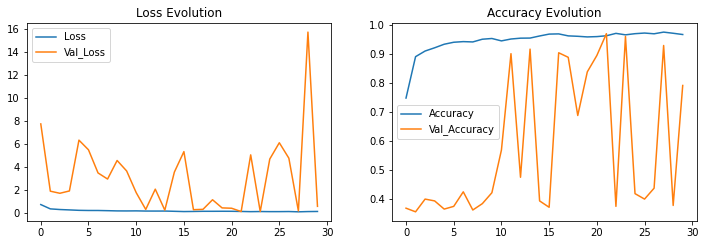

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history6.history['loss'], label='Loss')
plt.plot(history6.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history6.history['accuracy'], label='Accuracy')
plt.plot(history6.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation_resnet_model =resnet_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation_resnet_model[1] * 100:.2f}%")

evaluation_resnet_model = resnet_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation_resnet_model[1] * 100:.2f}%")

28/28 [==============================] - 20s 706ms/step - loss: 0.6133 - accuracy: 0.7600
Test Accuracy: 76.00%
87/87 [==============================] - 72s 827ms/step - loss: 0.5107 - accuracy: 0.8056
Train Accuracy: 80.56%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


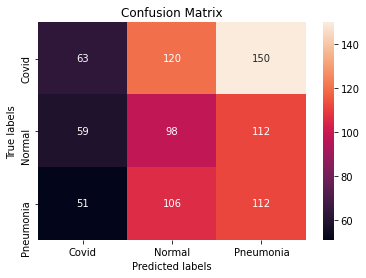

In [ ]:
predicted_vals = resnet_model.predict_classes(test_generator)

cm = confusion_matrix(test_generator.classes, predicted_vals)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

pd.DataFrame(classification_report(test_generator.classes, predicted_vals, output_dict=True))  
plt.show() 

# InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [ ]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(150,150,3),include_top=False,weights='imagenet')



87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
    inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(3,activation="softmax")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    inception_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

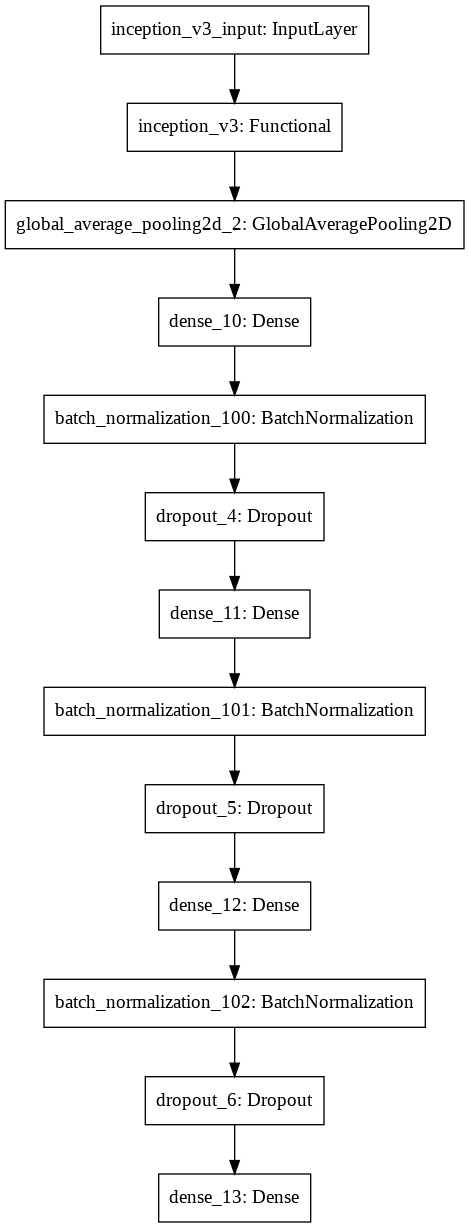

In [ ]:
tf.keras.utils.plot_model(inception_model)

In [ ]:
%%time
history7 = inception_model.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10
)


Epoch 1/30
87/87 [==============================] - 102s 1s/step - loss: 1.0703 - accuracy: 0.6286 - val_loss: 3.0209 - val_accuracy: 0.3656
Epoch 2/30
87/87 [==============================] - 86s 991ms/step - loss: 0.4374 - accuracy: 0.8513 - val_loss: 0.6213 - val_accuracy: 0.8375
Epoch 3/30
87/87 [==============================] - 86s 988ms/step - loss: 0.2698 - accuracy: 0.9171 - val_loss: 0.1253 - val_accuracy: 0.9594
Epoch 4/30
87/87 [==============================] - 86s 988ms/step - loss: 0.2108 - accuracy: 0.9361 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 5/30
87/87 [==============================] - 86s 987ms/step - loss: 0.2006 - accuracy: 0.9326 - val_loss: 0.1715 - val_accuracy: 0.9438
Epoch 6/30
87/87 [==============================] - 87s 995ms/step - loss: 0.1466 - accuracy: 0.9537 - val_loss: 0.1176 - val_accuracy: 0.9531
Epoch 7/30
87/87 [==============================] - 87s 998ms/step - loss: 0.1263 - accuracy: 0.9595 - val_loss: 0.4598 - val_accuracy: 0.8531
E

Text(0.5, 1.0, 'Accuracy Evolution')

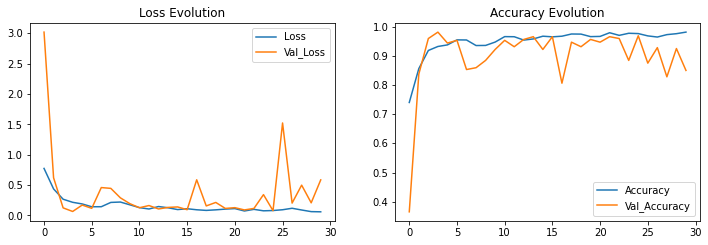

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history7.history['loss'], label='Loss')
plt.plot(history7.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history7.history['accuracy'], label='Accuracy')
plt.plot(history7.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation7 =inception_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation7[1] * 100:.2f}%")

evaluation7 = inception_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation7[1] * 100:.2f}%")

28/28 [==============================] - 20s 699ms/step - loss: 0.1687 - accuracy: 0.9472
Test Accuracy: 94.72%
87/87 [==============================] - 70s 802ms/step - loss: 0.3869 - accuracy: 0.8936
Train Accuracy: 89.36%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


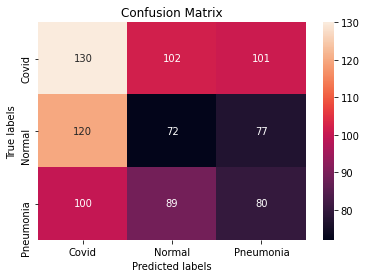

In [ ]:
predicted_vals = inception_model.predict_classes(test_generator)

cm = confusion_matrix(test_generator.classes, predicted_vals)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

pd.DataFrame(classification_report(test_generator.classes, predicted_vals, output_dict=True))  
plt.show() 

# Loading the Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_save_name = 'DenseNet121 trained on C+N+P with sigmoid - DataGenrator.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model4.save(path)

In [ ]:
model_save_name = 'model2.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model2.save(path)

In [ ]:
model_save_name = 'model3.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model3.save(path)

In [ ]:
model_save_name = 'model4.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model4.save(path)

In [ ]:
model_save_name = 'inception_model.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
inception_model.save(path)

In [ ]:
model_save_name = 'resnet_model.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
resnet_model.save(path)

In [ ]:
model_save_name = 'vgg16_model.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
vgg16_model.save(path)